
陳其邁曝新房城中城8歲小妹妹與媽媽很滿意- 社會
https://www.chinatimes.com/realtimenews/20211021005378-260402
悼念高雄城中城罹難者行政院宣布22日全國降半旗| 政治| 重點新聞
https://www.cna.com.tw/news/firstnews/202110215010.aspx
快訊／悼念城中城罹難國人政院宣布22日全國下半旗一天| 政治
https://www.setn.com/News.aspx?NewsID=1015612
悼念城中城罹難者行政院宣布明天全國降半旗｜ 蘋果新聞網 ...
https://tw.appledaily.com/politics/20211021/HBJUNDESEJFOJM4QTJIRDNPLLM/
城中城大火奪46條人命政院宣布：明全國降半旗悼念 TVBS ...
https://news.tvbs.com.tw/local/1614596
快訊／悼念城中城罹難者政院宣布22日全國降半旗| ETtoday ...
https://www.ettoday.net/news/20211021/2106722.htm
城中城大火賴清德盼建築業構思更好更安全設計(圖)
https://tw.news.yahoo.com/%E5%9F%8E%E4%B8%AD%E5%9F%8E%E5%A4%A7%E7%81%AB-%E8%B3%B4%E6%B8%85%E5%BE%B7%E7%9B%BC%E5%BB%BA%E7%AF%89%E6%A5%AD%E6%A7%8B%E6%80%9D%E6%9B%B4%E5%A5%BD%E6%9B%B4%E5%AE%89%E5%85%A8%E8%A8%AD%E8%A8%88-%E5%9C%96-140959471.html
悼念城中城罹難者政院宣布明天全國下半旗1日
https://tw.news.yahoo.com/%E6%82%BC%E5%BF%B5%E5%9F%8E%E4%B8%AD%E5%9F%8E%E7%BD%B9%E9%9B%A3%E8%80%85-%E6%94%BF%E9%99%A2%E5%AE%A3%E5%B8%83%E6%98%8E%E5%A4%A9%E5%85%A8%E5%9C%8B%E4%B8%8B%E5%8D%8A%E6

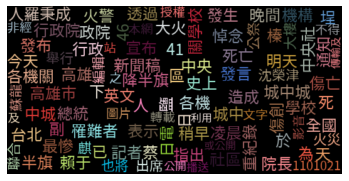

<Figure size 1800x1800 with 0 Axes>

In [8]:
#!/usr/bin/env python
# coding: utf-8
import pandas as pd
import requests
import jieba
from GoogleNews import GoogleNews
from bs4 import BeautifulSoup

googlenews = GoogleNews()

googlenews.setlang('cn')
googlenews.setperiod('d')
googlenews.setencode('utf-8')
googlenews.clear()

x = input("請輸入要搜尋的關鍵字，將為你搜集相關字詞內容:")
googlenews.search(x)

alldata = googlenews.result()
result = googlenews.gettext()
links = googlenews.get_links()
# print(type(result))
# print(len(result))
# print(alldata)


print()

for n in range(len(result)):
    print(result[n])
    print(links[n])

df = pd.DataFrame(
    {
        '標題': result,
        '連結': links
    })

url = df['連結'][1]
# 理想上是抓取全部連結文字

print(url)

user_agent = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36'}

r = requests.get(url, headers=user_agent)
r.encoding = "utf-8"
web_content = r.text
soup = BeautifulSoup(web_content,'html.parser')

articleContent = soup.find_all('p')

article = []
for p in articleContent:
    article.append(p.text)

articleAll = '\n'.join(article)
# print(articleAll)

# 分段用


jieba.load_userdict('dict.txt.big.txt')

d = articleAll.replace('[^\w\s]', '').replace('／', "").replace('《', '').replace('》', '').replace('，', '').replace('。',
                                                                                                                  '').replace(
    '「', '').replace('」', '').replace('（', '').replace('）', '').replace('！', '').replace('？', '').replace('、',
                                                                                                          '').replace(
    '▲', '').replace('…', '').replace('：', '')
# print(d)

jieba.setLogLevel(20)

# Sentence = jieba.cut(d, cut_all=True)
# print('全模式'+": "  + "/ ".join(Sentence) + '\n')   

# Sentence = jieba.cut(d, cut_all=False)
# print('精確模式'+": " + "/ ".join(Sentence)+ '\n')  

# Sentence = jieba.cut(d)  
# print('Default為精確模式'+": " + "/ ".join(Sentence)+ '\n')

Sentence = jieba.cut_for_search(d)
print('搜索引擎模式' + ": " + "/ ".join(Sentence) + '\n')

Sentence = jieba.cut_for_search(d)

from collections import Counter

import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

from wordcloud import WordCloud, ImageColorGenerator

from scipy.ndimage import gaussian_gradient_magnitude

with open('stopword.txt', 'r', encoding="utf-8") as f:
    stopwords = f.read().split('\n')

terms = {}
for sentence in Sentence:
    if sentence in stopwords:
        continue

    if sentence in terms:
        terms[sentence] += 1
    else:
        terms[sentence] = 1

print(Counter(terms))
# generate_from_text()方法會採納stopwords參數 也可使用

# https://coolors.co/palettes/popular


artDf = pd.DataFrame.from_dict(terms, orient='index', columns=['詞頻'])
artDf.sort_values(by=['詞頻'], ascending=False)

img = "color"
img_path = "%s.png" % img

mask_color = np.array(Image.open(img_path))
mask_color = mask_color[::3, ::3]
mask_image = mask_color.copy()
mask_image[mask_image.sum(axis=2) == 0] = 255

edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i] / 255., 5) for i in range(3)], axis=0)
mask_image[edges > .01] = 255
# 詳細參數定義沒有研究 從字面上應該是遮罩顏色取值範圍


wc = WordCloud(font_path="/Users/larry/Library/Fonts/TaipeiSansTCBeta-Regular.ttf",
               mask=mask_color,
               max_font_size=25,
               max_words=5000,
               stopwords=stopwords,
               margin=1,
               relative_scaling=0)

wc.generate_from_frequencies(terms)
image_colors = ImageColorGenerator(mask_color)
wc.recolor(color_func=image_colors)

# 視覺化

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(25, 25))
plt.show()

# plt.savefig("Wordcloud.png")
wc.to_file("img/2021-1021-城中城.png")

